In [44]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [45]:
import cv2
import oshttp://localhost:8888/notebooks/OneDrive/Documentos/TCC-Thiago-Mota-Carvalho/Baseline%20-%20MobileNet%20-%20kfold%20-%20100epochs%20-%201dropout%20-%20L2%20-%20data%20augmenting.ipynb#
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from tensorflow.keras.callbacks import *
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [46]:
CLASS_NAMES= ['healthy', 'mild', 'moderate', 'severe']
IMG_HEIGHT = 128
IMG_WIDTH = 128
CHANNELS = 3
NUM_CLASSES = len(CLASS_NAMES)

# **ResNET**

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
#load data
data_x = np.load('data_x_aumentated_normalized.npy') #images
data_y = np.load('data_y_aumentated_normalized.npy') #labels
TOTAL_IMAGES = len(data_y)
print("TOTAL_IMAGES = ", TOTAL_IMAGES)

TOTAL_IMAGES =  2368


In [49]:
VALIDATION_PERCENTAGE = 0.1

In [50]:
validation_size = int(VALIDATION_PERCENTAGE * TOTAL_IMAGES)

validation_x = data_x[:validation_size] #taking validation images from original data
validation_y = data_y[:validation_size]
data_x = data_x[validation_size:] #removing validation images from original data
data_y = data_y[validation_size:]

# **Splitting data in train - validation - test**

In [51]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from IPython.display import SVG
import scipy.misc

In [53]:
import tensorflow.keras.backend as K
from tensorflow.keras import models
from tensorflow.keras import layers

In [54]:
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.applications import EfficientNetB1
# from tensorflow.keras.applications import EfficientNetB2
# from tensorflow.keras.applications import EfficientNetB3
# from tensorflow.keras.applications import EfficientNetB4
# from tensorflow.keras.applications import EfficientNetB5
# from tensorflow.keras.applications import EfficientNetB6
# from tensorflow.keras.applications import EfficientNetB7
# from tensorflow.keras.applications import *

In [55]:
adam = tf.keras.optimizers.Adam(lr=0.001)

C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [56]:
def define_model():
    K.set_image_data_format('channels_last')
    K.set_learning_phase(1)
    model = tf.keras.applications.MobileNet(
        include_top=False,
        weights="imagenet",
        input_tensor=None,
        input_shape=(IMG_HEIGHT,IMG_WIDTH, CHANNELS),
        pooling=None,
        classes=NUM_CLASSES,
        # classifier_activation="softmax",
        # **kwargs
    )
    new_model = models.Sequential()
    new_model.add(model)
    #3rd conv layer
    new_model.add(tf.keras.layers.Conv2D(32, 3, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.MaxPooling2D(2))
    #4th conv layer
    new_model.add(tf.keras.layers.Conv2D(64, 3, padding="same"))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.MaxPooling2D(2))
    #Flatten Layer
    new_model.add(tf.keras.layers.Flatten())

    new_model.add(tf.keras.layers.Dense(128, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
    new_model.add(tf.keras.layers.BatchNormalization())
    new_model.add(tf.keras.layers.Activation("relu"))
    new_model.add(tf.keras.layers.Dropout(0.2))
    #new_model.add(tf.keras.layers.l2( l=0.01))
    #new_model.add(layers.GlobalAveragePooling2D())
    #output Dense Layer
    new_model.add(tf.keras.layers.Dense(NUM_CLASSES))
    new_model.add(tf.keras.layers.Activation('softmax'))
    return new_model

In [57]:
kfold = KFold(n_splits=5, shuffle=True, random_state=7)
cvscores = []
epochs = 100
num_classes = 2
num_kfold=1
all_models = []

C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
54/54 - 9s - loss: 1.6573 - accuracy: 0.6622 - val_loss: 3.4358 - val_accuracy: 0.3653 - 9s/epoch - 170ms/step
Epoch 2/100
54/54 - 6s - loss: 0.9814 - accuracy: 0.8798 - val_loss: 3.8360 - val_accuracy: 0.3653 - 6s/epoch - 110ms/step
Epoch 3/100
54/54 - 6s - loss: 0.6707 - accuracy: 0.9507 - val_loss: 5.7897 - val_accuracy: 0.2857 - 6s/epoch - 110ms/step
Epoch 4/100
54/54 - 6s - loss: 0.5001 - accuracy: 0.9736 - val_loss: 3.5725 - val_accuracy: 0.4496 - 6s/epoch - 111ms/step
Epoch 5/100
54/54 - 6s - loss: 0.4237 - accuracy: 0.9630 - val_loss: 2.5986 - val_accuracy: 0.4614 - 6s/epoch - 115ms/step
Epoch 6/100
54/54 - 6s - loss: 0.3708 - accuracy: 0.9601 - val_loss: 1.1323 - val_accuracy: 0.7799 - 6s/epoch - 112ms/step
Epoch 7/100
54/54 - 6s - loss: 0.3473 - accuracy: 0.9455 - val_loss: 2.3345 - val_accuracy: 0.5527 - 6s/epoch - 112ms/step
Epoch 8/100
54/54 - 6s - loss: 0.2413 - accuracy: 0.9689 - val_loss: 1.8598 - val_accuracy: 0.6300 - 6s/epoch - 110ms/step
Epoch 9/100
54/5

Epoch 67/100
54/54 - 6s - loss: 3.8510e-04 - accuracy: 1.0000 - val_loss: 0.0908 - val_accuracy: 0.9719 - 6s/epoch - 112ms/step
Epoch 68/100
54/54 - 6s - loss: 3.8707e-04 - accuracy: 1.0000 - val_loss: 0.0927 - val_accuracy: 0.9719 - 6s/epoch - 112ms/step
Epoch 69/100
54/54 - 6s - loss: 3.7530e-04 - accuracy: 1.0000 - val_loss: 0.0938 - val_accuracy: 0.9719 - 6s/epoch - 111ms/step
Epoch 70/100
54/54 - 6s - loss: 3.6285e-04 - accuracy: 1.0000 - val_loss: 0.0924 - val_accuracy: 0.9719 - 6s/epoch - 111ms/step
Epoch 71/100
54/54 - 6s - loss: 3.4598e-04 - accuracy: 1.0000 - val_loss: 0.0912 - val_accuracy: 0.9719 - 6s/epoch - 112ms/step
Epoch 72/100
54/54 - 6s - loss: 3.4876e-04 - accuracy: 1.0000 - val_loss: 0.0952 - val_accuracy: 0.9719 - 6s/epoch - 112ms/step
Epoch 73/100
54/54 - 6s - loss: 3.3325e-04 - accuracy: 1.0000 - val_loss: 0.0922 - val_accuracy: 0.9719 - 6s/epoch - 111ms/step
Epoch 74/100
54/54 - 6s - loss: 3.2385e-04 - accuracy: 1.0000 - val_loss: 0.0956 - val_accuracy: 0.9719 

INFO:tensorflow:Assets written to: mobilenet_100epochs_augmented_kfold_1.npy\assets


INFO:tensorflow:Assets written to: mobilenet_100epochs_augmented_kfold_1.npy\assets
C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
54/54 - 9s - loss: 1.5107 - accuracy: 0.6158 - val_loss: 5.8473 - val_accuracy: 0.2670 - 9s/epoch - 174ms/step
Epoch 2/100
54/54 - 6s - loss: 0.6688 - accuracy: 0.8452 - val_loss: 2.9346 - val_accuracy: 0.2810 - 6s/epoch - 112ms/step
Epoch 3/100
54/54 - 6s - loss: 0.4325 - accuracy: 0.8839 - val_loss: 3.8110 - val_accuracy: 0.2576 - 6s/epoch - 110ms/step
Epoch 4/100
54/54 - 6s - loss: 0.3643 - accuracy: 0.8933 - val_loss: 1.5924 - val_accuracy: 0.5785 - 6s/epoch - 110ms/step
Epoch 5/100
54/54 - 6s - loss: 0.2657 - accuracy: 0.9226 - val_loss: 1.8061 - val_accuracy: 0.5925 - 6s/epoch - 110ms/step
Epoch 6/100
54/54 - 6s - loss: 0.1784 - accuracy: 0.9584 - val_loss: 2.2359 - val_accuracy: 0.5433 - 6s/epoch - 110ms/step
Epoch 7/100
54/54 - 6s - loss: 0.1305 - accuracy: 0.9689 - val_loss: 2.5578 - val_accuracy: 0.5410 - 6s/epoch - 111ms/step
Epoch 8/100
54/54 - 6s - loss: 0.1514 - accuracy: 0.9584 - val_loss: 0.4387 - val_accuracy: 0.8571 - 6s/epoch - 111ms/step
Epoch 9/100
54/5

Epoch 67/100
54/54 - 6s - loss: 4.5751e-04 - accuracy: 1.0000 - val_loss: 0.1351 - val_accuracy: 0.9789 - 6s/epoch - 112ms/step
Epoch 68/100
54/54 - 6s - loss: 4.2722e-04 - accuracy: 1.0000 - val_loss: 0.1543 - val_accuracy: 0.9696 - 6s/epoch - 112ms/step
Epoch 69/100
54/54 - 6s - loss: 4.0672e-04 - accuracy: 1.0000 - val_loss: 0.1410 - val_accuracy: 0.9742 - 6s/epoch - 112ms/step
Epoch 70/100
54/54 - 6s - loss: 4.4633e-04 - accuracy: 1.0000 - val_loss: 0.1281 - val_accuracy: 0.9696 - 6s/epoch - 113ms/step
Epoch 71/100
54/54 - 6s - loss: 4.6168e-04 - accuracy: 1.0000 - val_loss: 0.1617 - val_accuracy: 0.9672 - 6s/epoch - 112ms/step
Epoch 72/100
54/54 - 6s - loss: 3.6383e-04 - accuracy: 1.0000 - val_loss: 0.1342 - val_accuracy: 0.9789 - 6s/epoch - 112ms/step
Epoch 73/100
54/54 - 6s - loss: 4.0393e-04 - accuracy: 1.0000 - val_loss: 0.1255 - val_accuracy: 0.9766 - 6s/epoch - 112ms/step
Epoch 74/100
54/54 - 6s - loss: 4.2027e-04 - accuracy: 1.0000 - val_loss: 0.1455 - val_accuracy: 0.9719 

INFO:tensorflow:Assets written to: mobilenet_100epochs_augmented_kfold_2.npy\assets


INFO:tensorflow:Assets written to: mobilenet_100epochs_augmented_kfold_2.npy\assets
C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
54/54 - 9s - loss: 1.4467 - accuracy: 0.6413 - val_loss: 3.3819 - val_accuracy: 0.2488 - 9s/epoch - 172ms/step
Epoch 2/100
54/54 - 6s - loss: 0.6513 - accuracy: 0.8324 - val_loss: 6.1718 - val_accuracy: 0.2488 - 6s/epoch - 112ms/step
Epoch 3/100
54/54 - 6s - loss: 0.4623 - accuracy: 0.8705 - val_loss: 5.2797 - val_accuracy: 0.2817 - 6s/epoch - 114ms/step
Epoch 4/100
54/54 - 6s - loss: 0.3076 - accuracy: 0.9080 - val_loss: 5.6250 - val_accuracy: 0.2958 - 6s/epoch - 112ms/step
Epoch 5/100
54/54 - 6s - loss: 0.3132 - accuracy: 0.9039 - val_loss: 3.6766 - val_accuracy: 0.3239 - 6s/epoch - 114ms/step
Epoch 6/100
54/54 - 6s - loss: 0.1803 - accuracy: 0.9543 - val_loss: 1.6623 - val_accuracy: 0.5869 - 6s/epoch - 113ms/step
Epoch 7/100
54/54 - 6s - loss: 0.1392 - accuracy: 0.9572 - val_loss: 1.7668 - val_accuracy: 0.5634 - 6s/epoch - 112ms/step
Epoch 8/100
54/54 - 6s - loss: 0.1253 - accuracy: 0.9631 - val_loss: 0.6062 - val_accuracy: 0.8005 - 6s/epoch - 112ms/step
Epoch 9/100
54/5

Epoch 67/100
54/54 - 6s - loss: 3.4594e-04 - accuracy: 1.0000 - val_loss: 0.2456 - val_accuracy: 0.9413 - 6s/epoch - 113ms/step
Epoch 68/100
54/54 - 6s - loss: 3.9174e-04 - accuracy: 1.0000 - val_loss: 0.2136 - val_accuracy: 0.9484 - 6s/epoch - 113ms/step
Epoch 69/100
54/54 - 6s - loss: 3.6866e-04 - accuracy: 1.0000 - val_loss: 0.2081 - val_accuracy: 0.9507 - 6s/epoch - 113ms/step
Epoch 70/100
54/54 - 6s - loss: 3.4027e-04 - accuracy: 1.0000 - val_loss: 0.2179 - val_accuracy: 0.9507 - 6s/epoch - 113ms/step
Epoch 71/100
54/54 - 6s - loss: 3.2278e-04 - accuracy: 1.0000 - val_loss: 0.2347 - val_accuracy: 0.9437 - 6s/epoch - 113ms/step
Epoch 72/100
54/54 - 6s - loss: 3.0106e-04 - accuracy: 1.0000 - val_loss: 0.2121 - val_accuracy: 0.9484 - 6s/epoch - 113ms/step
Epoch 73/100
54/54 - 6s - loss: 2.9757e-04 - accuracy: 1.0000 - val_loss: 0.2234 - val_accuracy: 0.9484 - 6s/epoch - 113ms/step
Epoch 74/100
54/54 - 6s - loss: 2.9519e-04 - accuracy: 1.0000 - val_loss: 0.2189 - val_accuracy: 0.9484 

INFO:tensorflow:Assets written to: mobilenet_100epochs_augmented_kfold_3.npy\assets


INFO:tensorflow:Assets written to: mobilenet_100epochs_augmented_kfold_3.npy\assets
C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
54/54 - 9s - loss: 1.5756 - accuracy: 0.5979 - val_loss: 11.0609 - val_accuracy: 0.2300 - 9s/epoch - 173ms/step
Epoch 2/100
54/54 - 6s - loss: 0.7227 - accuracy: 0.8113 - val_loss: 7.6576 - val_accuracy: 0.3451 - 6s/epoch - 112ms/step
Epoch 3/100
54/54 - 6s - loss: 0.4545 - accuracy: 0.8851 - val_loss: 5.5215 - val_accuracy: 0.2981 - 6s/epoch - 112ms/step
Epoch 4/100
54/54 - 6s - loss: 0.3451 - accuracy: 0.9039 - val_loss: 2.9784 - val_accuracy: 0.3920 - 6s/epoch - 112ms/step
Epoch 5/100
54/54 - 6s - loss: 0.2199 - accuracy: 0.9420 - val_loss: 4.6329 - val_accuracy: 0.4085 - 6s/epoch - 112ms/step
Epoch 6/100
54/54 - 6s - loss: 0.1474 - accuracy: 0.9613 - val_loss: 1.4324 - val_accuracy: 0.6150 - 6s/epoch - 112ms/step
Epoch 7/100
54/54 - 6s - loss: 0.1051 - accuracy: 0.9736 - val_loss: 0.4235 - val_accuracy: 0.8685 - 6s/epoch - 112ms/step
Epoch 8/100
54/54 - 6s - loss: 0.0845 - accuracy: 0.9812 - val_loss: 1.4684 - val_accuracy: 0.6455 - 6s/epoch - 112ms/step
Epoch 9/100
54/

54/54 - 6s - loss: 3.7992e-04 - accuracy: 1.0000 - val_loss: 0.3465 - val_accuracy: 0.9366 - 6s/epoch - 113ms/step
Epoch 67/100
54/54 - 6s - loss: 3.6954e-04 - accuracy: 1.0000 - val_loss: 0.3429 - val_accuracy: 0.9296 - 6s/epoch - 113ms/step
Epoch 68/100
54/54 - 6s - loss: 3.7346e-04 - accuracy: 1.0000 - val_loss: 0.3380 - val_accuracy: 0.9343 - 6s/epoch - 113ms/step
Epoch 69/100
54/54 - 6s - loss: 3.6071e-04 - accuracy: 1.0000 - val_loss: 0.3269 - val_accuracy: 0.9366 - 6s/epoch - 113ms/step
Epoch 70/100
54/54 - 6s - loss: 3.3169e-04 - accuracy: 1.0000 - val_loss: 0.3301 - val_accuracy: 0.9366 - 6s/epoch - 113ms/step
Epoch 71/100
54/54 - 6s - loss: 3.3783e-04 - accuracy: 1.0000 - val_loss: 0.3456 - val_accuracy: 0.9366 - 6s/epoch - 113ms/step
Epoch 72/100
54/54 - 6s - loss: 3.3456e-04 - accuracy: 1.0000 - val_loss: 0.3447 - val_accuracy: 0.9296 - 6s/epoch - 113ms/step
Epoch 73/100
54/54 - 6s - loss: 3.2104e-04 - accuracy: 1.0000 - val_loss: 0.3279 - val_accuracy: 0.9296 - 6s/epoch - 

INFO:tensorflow:Assets written to: mobilenet_100epochs_augmented_kfold_4.npy\assets


INFO:tensorflow:Assets written to: mobilenet_100epochs_augmented_kfold_4.npy\assets
C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Epoch 1/100
54/54 - 9s - loss: 1.5142 - accuracy: 0.6143 - val_loss: 3.6191 - val_accuracy: 0.2676 - 9s/epoch - 174ms/step
Epoch 2/100
54/54 - 6s - loss: 0.7312 - accuracy: 0.8089 - val_loss: 4.2426 - val_accuracy: 0.2887 - 6s/epoch - 112ms/step
Epoch 3/100
54/54 - 6s - loss: 0.4512 - accuracy: 0.8787 - val_loss: 4.8549 - val_accuracy: 0.2958 - 6s/epoch - 112ms/step
Epoch 4/100
54/54 - 6s - loss: 0.2712 - accuracy: 0.9338 - val_loss: 4.7079 - val_accuracy: 0.3897 - 6s/epoch - 112ms/step
Epoch 5/100
54/54 - 6s - loss: 0.1884 - accuracy: 0.9502 - val_loss: 4.4736 - val_accuracy: 0.3732 - 6s/epoch - 112ms/step
Epoch 6/100
54/54 - 6s - loss: 0.1745 - accuracy: 0.9484 - val_loss: 4.1935 - val_accuracy: 0.4061 - 6s/epoch - 112ms/step
Epoch 7/100
54/54 - 6s - loss: 0.1659 - accuracy: 0.9525 - val_loss: 2.0321 - val_accuracy: 0.5775 - 6s/epoch - 112ms/step
Epoch 8/100
54/54 - 6s - loss: 0.0911 - accuracy: 0.9777 - val_loss: 1.5931 - val_accuracy: 0.5986 - 6s/epoch - 112ms/step
Epoch 9/100
54/5

54/54 - 6s - loss: 4.7245e-04 - accuracy: 1.0000 - val_loss: 0.2357 - val_accuracy: 0.9531 - 6s/epoch - 113ms/step
Epoch 67/100
54/54 - 6s - loss: 4.0297e-04 - accuracy: 1.0000 - val_loss: 0.2476 - val_accuracy: 0.9484 - 6s/epoch - 113ms/step
Epoch 68/100
54/54 - 6s - loss: 4.7891e-04 - accuracy: 1.0000 - val_loss: 0.4999 - val_accuracy: 0.9155 - 6s/epoch - 113ms/step
Epoch 69/100
54/54 - 6s - loss: 5.4066e-04 - accuracy: 1.0000 - val_loss: 0.2397 - val_accuracy: 0.9531 - 6s/epoch - 114ms/step
Epoch 70/100
54/54 - 6s - loss: 3.8495e-04 - accuracy: 1.0000 - val_loss: 0.2300 - val_accuracy: 0.9554 - 6s/epoch - 114ms/step
Epoch 71/100
54/54 - 6s - loss: 4.0745e-04 - accuracy: 1.0000 - val_loss: 0.2301 - val_accuracy: 0.9554 - 6s/epoch - 115ms/step
Epoch 72/100
54/54 - 6s - loss: 4.0353e-04 - accuracy: 1.0000 - val_loss: 0.2372 - val_accuracy: 0.9531 - 6s/epoch - 118ms/step
Epoch 73/100
54/54 - 6s - loss: 3.6293e-04 - accuracy: 1.0000 - val_loss: 0.2400 - val_accuracy: 0.9507 - 6s/epoch - 

INFO:tensorflow:Assets written to: mobilenet_100epochs_augmented_kfold_5.npy\assets


INFO:tensorflow:Assets written to: mobilenet_100epochs_augmented_kfold_5.npy\assets


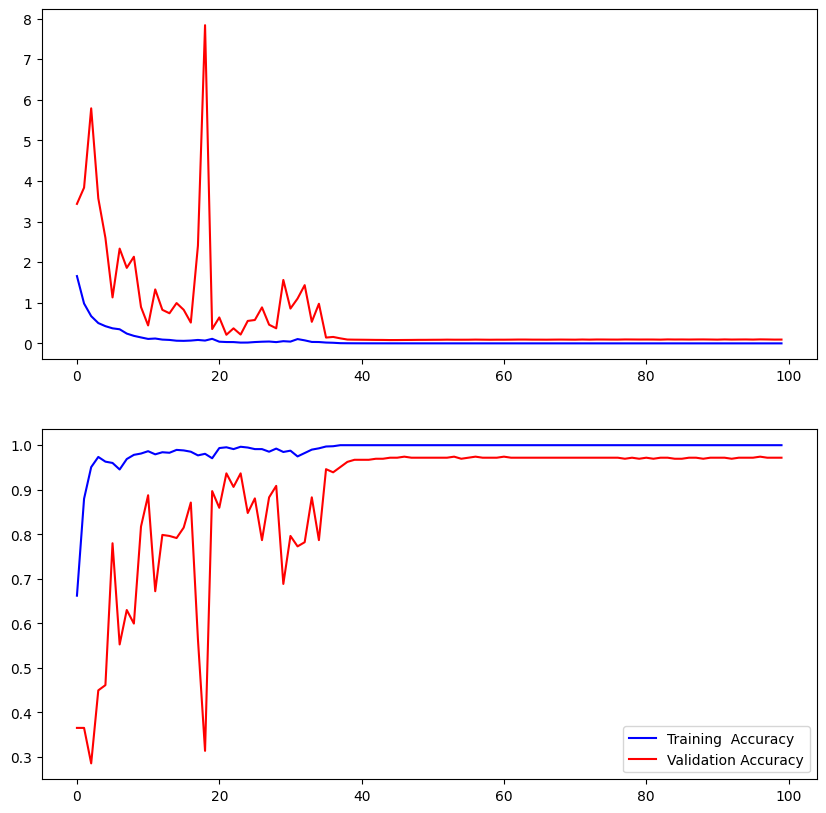

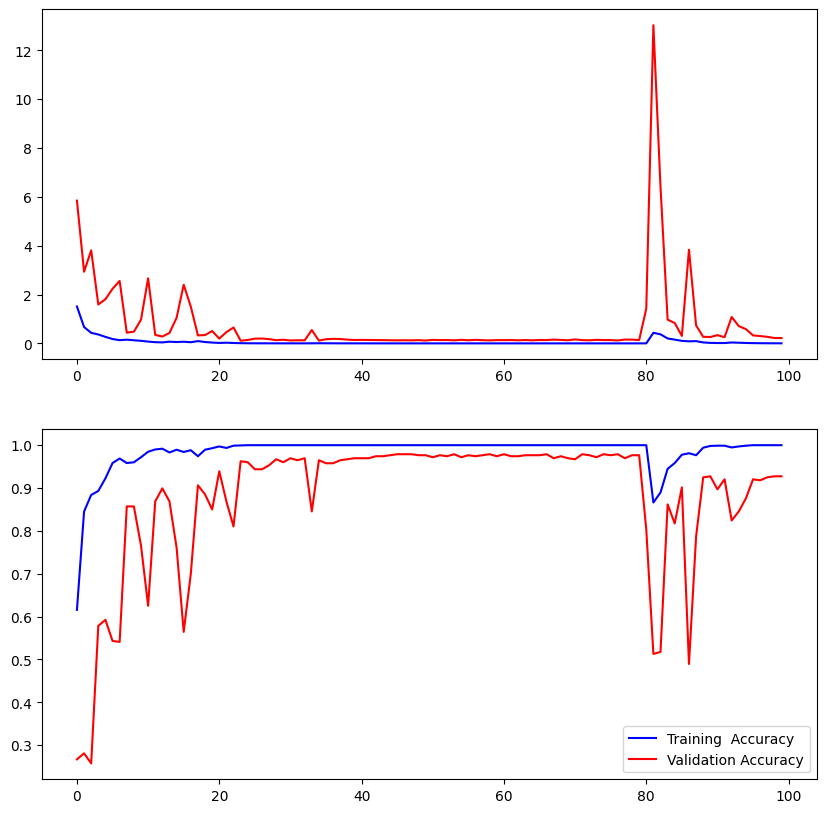

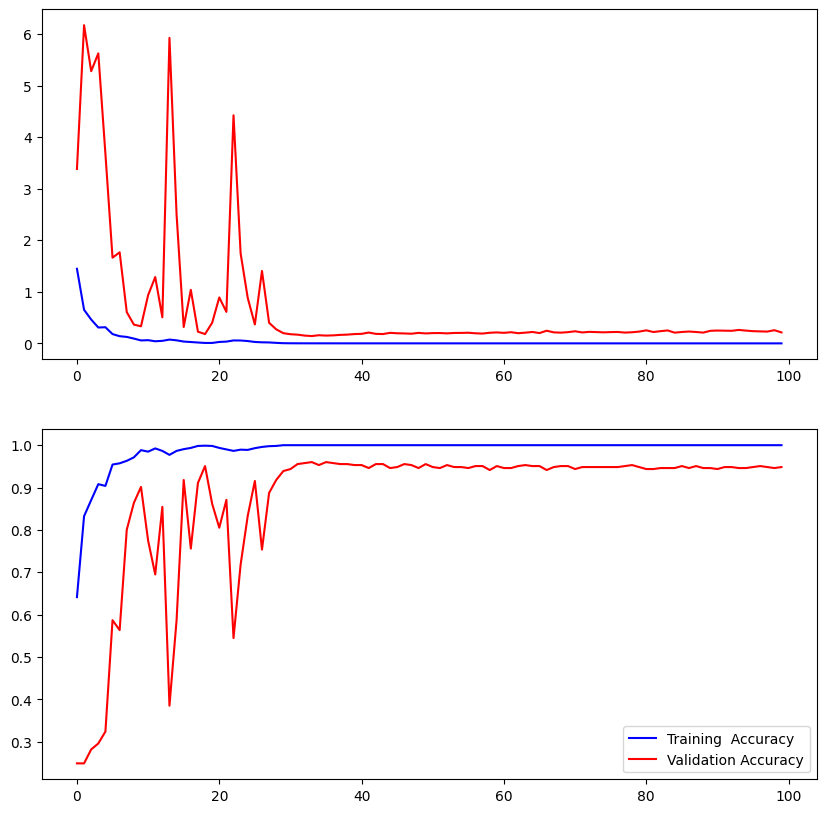

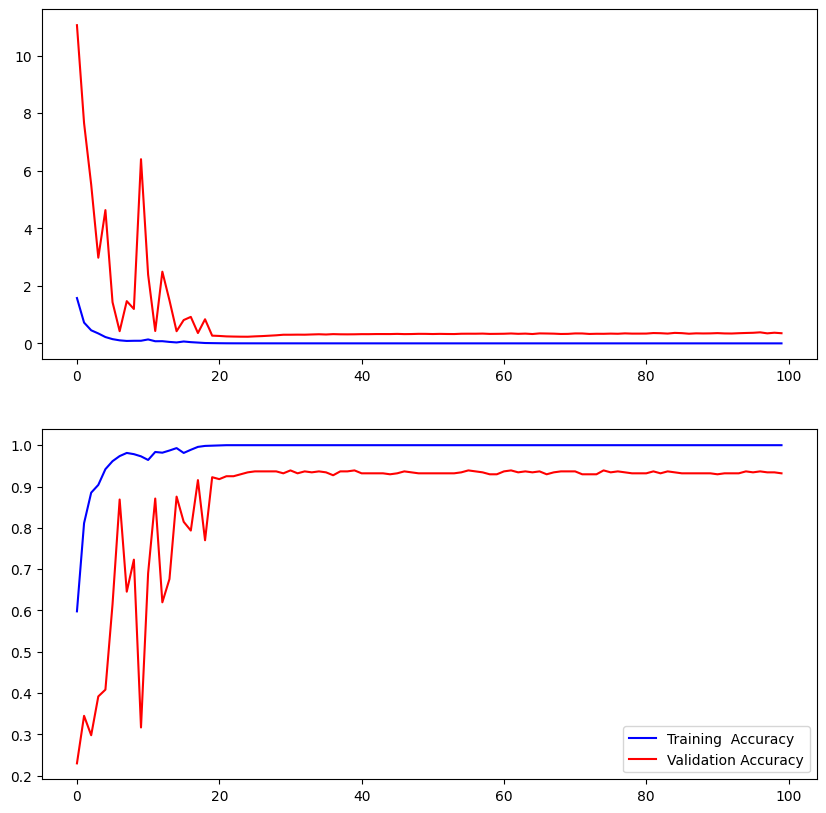

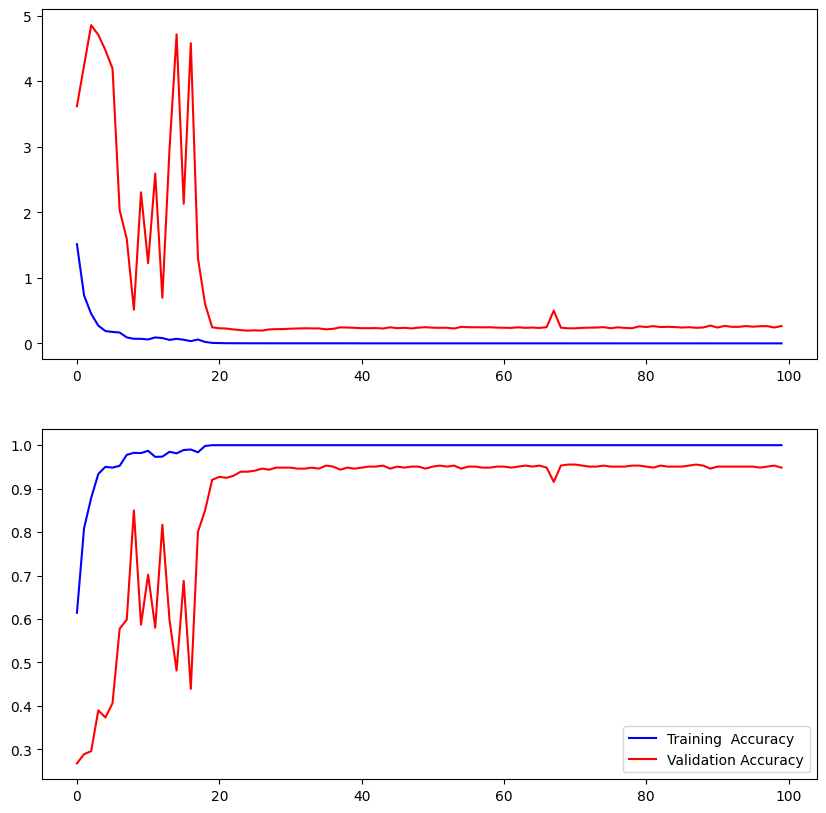

In [58]:
for train, test in kfold.split (data_x, data_y):
    new_model = define_model()

    new_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=adam)
    history = new_model.fit(data_x[train], data_y[train],
                                epochs=epochs,verbose=2,validation_data=(data_x[test], data_y[test]), shuffle=False)

    new_model.history.history.keys()
    f,ax=plt.subplots(2,1,figsize=(10,10)) 

    #Assigning the first subplot to graph training loss and validation loss
    ax[0].plot(new_model.history.history['loss'],color='b',label='Training Loss')
    ax[0].plot(new_model.history.history['val_loss'],color='r',label='Validation Loss')

    #Plotting the training accuracy and validation accuracy
    ax[1].plot(new_model.history.history['accuracy'],color='b',label='Training  Accuracy')
    ax[1].plot(new_model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

    plt.legend()
    print('Accuracy Score = ',np.max(history.history['val_accuracy']))

    scores = new_model.evaluate(validation_x,validation_y,verbose=0)
    print("%s: %.2f%%" %(new_model.metrics_names[1],scores[1]*100))
    cvscores.append(scores[1]*100)
    
    new_model.save(f'mobilenet_100epochs_augmented_kfold_{str(num_kfold)}.npy')
    all_models.append(new_model)
    num_kfold = num_kfold + 1

In [59]:
print("%.2f%% (+/- %.2f%%)" %(np.mean(cvscores),np.std(cvscores)))

93.98% (+/- 1.05%)


**Random forest - flatting**

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
cvscores_rf = []
for new_model in all_models:
    new_model_rf = keras.Model(inputs=new_model.input, outputs=new_model.get_layer(index=9).output)
    featureVector = new_model_rf.predict(data_x)
    featureVector2 = new_model_rf.predict(validation_x)
    clf=RandomForestClassifier(n_estimators=100)
    clf.fit(featureVector,data_y)
    y_pred=clf.predict(featureVector2)
    score = metrics.accuracy_score(validation_y, y_pred)
    cvscores_rf.append(score)
    print("Accuracy:",score)

8/8 [==============================] - 0s 30ms/step
Accuracy: 0.9661016949152542
8/8 [==============================] - 0s 30ms/step
Accuracy: 0.9661016949152542
8/8 [==============================] - 0s 32ms/step
Accuracy: 0.9364406779661016
8/8 [==============================] - 0s 31ms/step
Accuracy: 0.940677966101695
8/8 [==============================] - 0s 32ms/step
Accuracy: 0.9703389830508474


In [62]:
print("%.2f%% (+/- %.2f%%)" %(np.mean(cvscores_rf),np.std(cvscores_rf)))

0.96% (+/- 0.01%)


# **Testes**

In [ ]:
import matplotlib.pyplot as plt

accuracy = model_trained.history['acc']
val_accuracy = model_trained.history['val_acc']
loss = model_trained.history['loss']
val_loss = model_trained.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Acurácia de treino')
plt.plot(epochs, val_accuracy, 'g', label='Acurácia de validação')
plt.title('Acurácia de treino e validação')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Perda no treino')
plt.plot(epochs, val_loss, 'g', label='Perda na validação')
plt.title('Perda na validação e treino')
plt.legend()
plt.show()

In [ ]:
#avalia a fase de teste

model_loss, model_accuracy = new_model.evaluate(test_x, test_y, verbose=1)

#mostra o resultado
print('Test loss:', model_loss)
print('Test accuracy:', model_accuracy)

In [ ]:
#faz a predição das imagens

from tensorflow.keras.utils import to_categorical

pred = new_model.predict(test_x, verbose=0)

pred_probs = np.argmax(pred,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
cm = confusion_matrix(test_y, pred_probs)

In [ ]:
#gera os valores de falso positivo, falso negativo, verdadeiro positivo e verdadeiro negativo
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

f1score = f1_score(test_y, pred_probs, average='weighted')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy    = (tp + tn) / (tp + tn + fp + fn)
precision   = tp / (tp + fp)


print("F1 Score:", f1score)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:  ", precision)
print("Accuracy:   ", accuracy)